# Fairness and Bias in Machine Learning

![image info](https://static.propublica.org/projects/algorithmic-bias/assets/img/generated/opener-b-crop-1200*675-00796e.jpg)


## Data analysis on the ProPublica Dataset

The goal of this exercise is to have you interact with the **COMPAS dataset**, to clean the dataset for analysis, extract insight, visualize findings, and replicate a part of the **ProPublica's analysis**.

## Loading and surveying the data

* Load the dataset `compas-scores-two-years.csv`

### Columns of Interest:
* `age` - Age of the defendant. It is numeric.
* `age_cat` - Category of Age. It can be < 25, 25-45, >45.
* `sex` - Sex of the defendant. It is either 'Male' or 'Female'
* `race` - Race of the defendant. It can be 'African-American', 'Caucasian', 'Hispanic', 'Asian', or 'Other'.
* `c_charge_degree` - Degree of the crime. It is either M (Misdemeanor), F (Felony), or O (not causing jail time).
* `priors_count` - Count of prior crimes committed by the defendant. It is numeric.
* `days_b_screening_arrest` - Days between the arrest and COMPAS screening.
* `decile_score` - The COMPAS score predicted by the system. It is between 0-10.
* `score_text` - Category of decile score. It can be Low (1-4), Medium (5-7), and High (8-10).
* `is_recid` - A variable to indicate if recidivism was done by the defendant. It can be 0, 1, -1.
* `two_year_recid` - A variable to indicate if recidivism was done by the defendant within two years.
* `c_jail_in` - Time when the defendant was jailed.
* `c_jail_out` - Time when the defendant was released from the jail.

In [1]:
import pandas as pd

cols = ["age", "age_cat", "sex", "race", "c_charge_degree", "priors_count", 
        "days_b_screening_arrest", "decile_score", "score_text", "is_recid", "two_year_recid",
        "c_jail_in", "c_jail_out"]

data = pd.read_csv("compas-scores-two-years.csv", usecols=cols)

In [2]:
data.head()

,sex,age,age_cat,race,decile_score,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_charge_degree,is_recid,score_text,two_year_recid
0,Male,69,Greater than 45,Other,1,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,F,0,Low,0
1,Male,34,25 - 45,African-American,3,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,F,1,Low,1
2,Male,24,Less than 25,African-American,4,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,F,1,Low,1
3,Male,23,Less than 25,African-American,8,1,NaN,NaN,NaN,F,0,High,0
4,Male,43,25 - 45,Other,1,2,NaN,NaN,NaN,F,0,Low,0


## Data Cleaning
Now that we have surveyed the dataset, let's look into cleaning the data. This data-cleaning is largely based off of ProPublica's methods:
1. We only focus on cases where the COMPAS scored crime happened within +/- 30 days from when the person was arrested (if the value is missing, the record should be removed). 
2. Then, we also get rid of cases where is_recid is -1 since we only want binary values for the purpose of our analysis (0 for no recidivism, 1 for yes recidivism). 
3. Finally, we don't want the c_charge_degree to be "O" which denotes ordinary traffic offenses (not as serious of a crime). 

The cleaned dataset has 6172 records and 13 features.

In [3]:
data = data[(data["days_b_screening_arrest"] <= 30) & (data["days_b_screening_arrest"] >= -30)] 

data = data[data["is_recid"] >= 0] 

data = data[data["c_charge_degree"] != "O"] 

print("DataFrame shape:", data.shape)
data.head(5)

DataFrame shape: (6172, 13)


,sex,age,age_cat,race,decile_score,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_charge_degree,is_recid,score_text,two_year_recid
0,Male,69,Greater than 45,Other,1,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,F,0,Low,0
1,Male,34,25 - 45,African-American,3,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,F,1,Low,1
2,Male,24,Less than 25,African-American,4,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,F,1,Low,1
5,Male,44,25 - 45,Other,1,0,0.0,2013-11-30 04:50:18,2013-12-01 12:28:56,M,0,Low,0
6,Male,41,25 - 45,Caucasian,6,14,-1.0,2014-02-18 05:08:24,2014-02-24 12:18:30,F,1,Medium,1


## Exploratory data Analysis

Let's study basic statistics of the dataset
* Frequency of different attributes (such as race, age, decile score, prio_counts)
* General descriptive statistics of the dataset

In [4]:
pd.value_counts(data['race'])

race
African-American    3175
Caucasian           2103
Hispanic             509
Other                343
Asian                 31
Native American       11
Name: count, dtype: int64

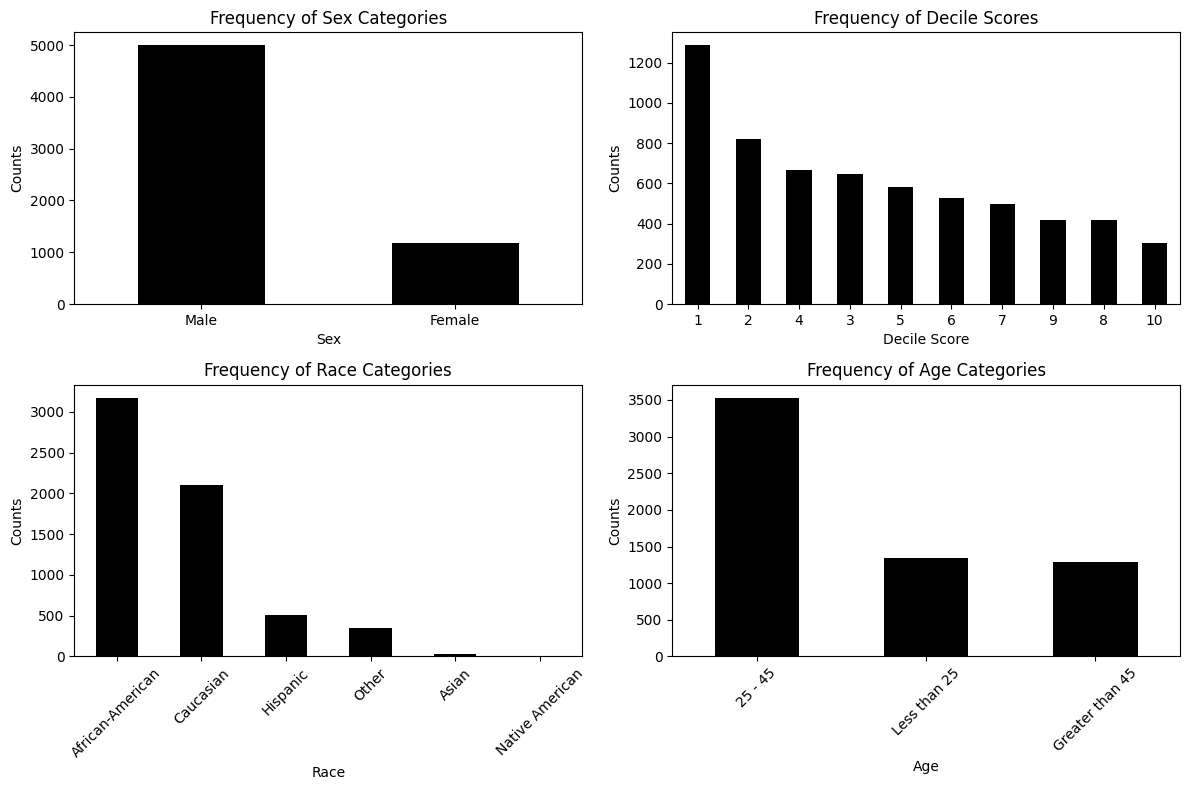

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize=(12,8))

pd.value_counts(data['race']).plot.bar(rot=45, title="Frequency of Race Categories", ylabel="Counts", xlabel="Race", ax=ax[1,0], color='k')
pd.value_counts(data['sex']).plot.bar(rot=0, title="Frequency of Sex Categories", ylabel="Counts", xlabel="Sex", ax=ax[0,0], color='k')
pd.value_counts(data['age_cat']).plot.bar(rot=45, title="Frequency of Age Categories", ylabel="Counts", xlabel="Age", ax=ax[1,1], color='k')
pd.value_counts(data['decile_score']).plot.bar(rot=0, title="Frequency of Decile Scores", ylabel="Counts", xlabel="Decile Score", ax=ax[0,1], color='k')

fig.tight_layout()
plt.show()

In [6]:
data.describe()

,age,decile_score,priors_count,days_b_screening_arrest,is_recid,two_year_recid
count,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000
mean,34.534511,4.418503,3.246436,-1.740279,0.484446,0.455120
std,11.730938,2.839463,4.743770,5.084709,0.499799,0.498022
min,18.000000,1.000000,0.000000,-30.000000,0.000000,0.000000
25%,25.000000,2.000000,0.000000,-1.000000,0.000000,0.000000
50%,31.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
75%,42.000000,7.000000,4.000000,-1.000000,1.000000,1.000000
max,96.000000,10.000000,38.000000,30.000000,1.000000,1.000000


## Bias Analysis

* Study the distribution of the recidivism score `decile_score` for different categories: does recidivism have the same distribution for different races? For different genders? 
    
* If it is not distributed in the same way, which biases do you identify in the input dataset that can lead to different distributions? 
    * List the ones you think are present and explain why.

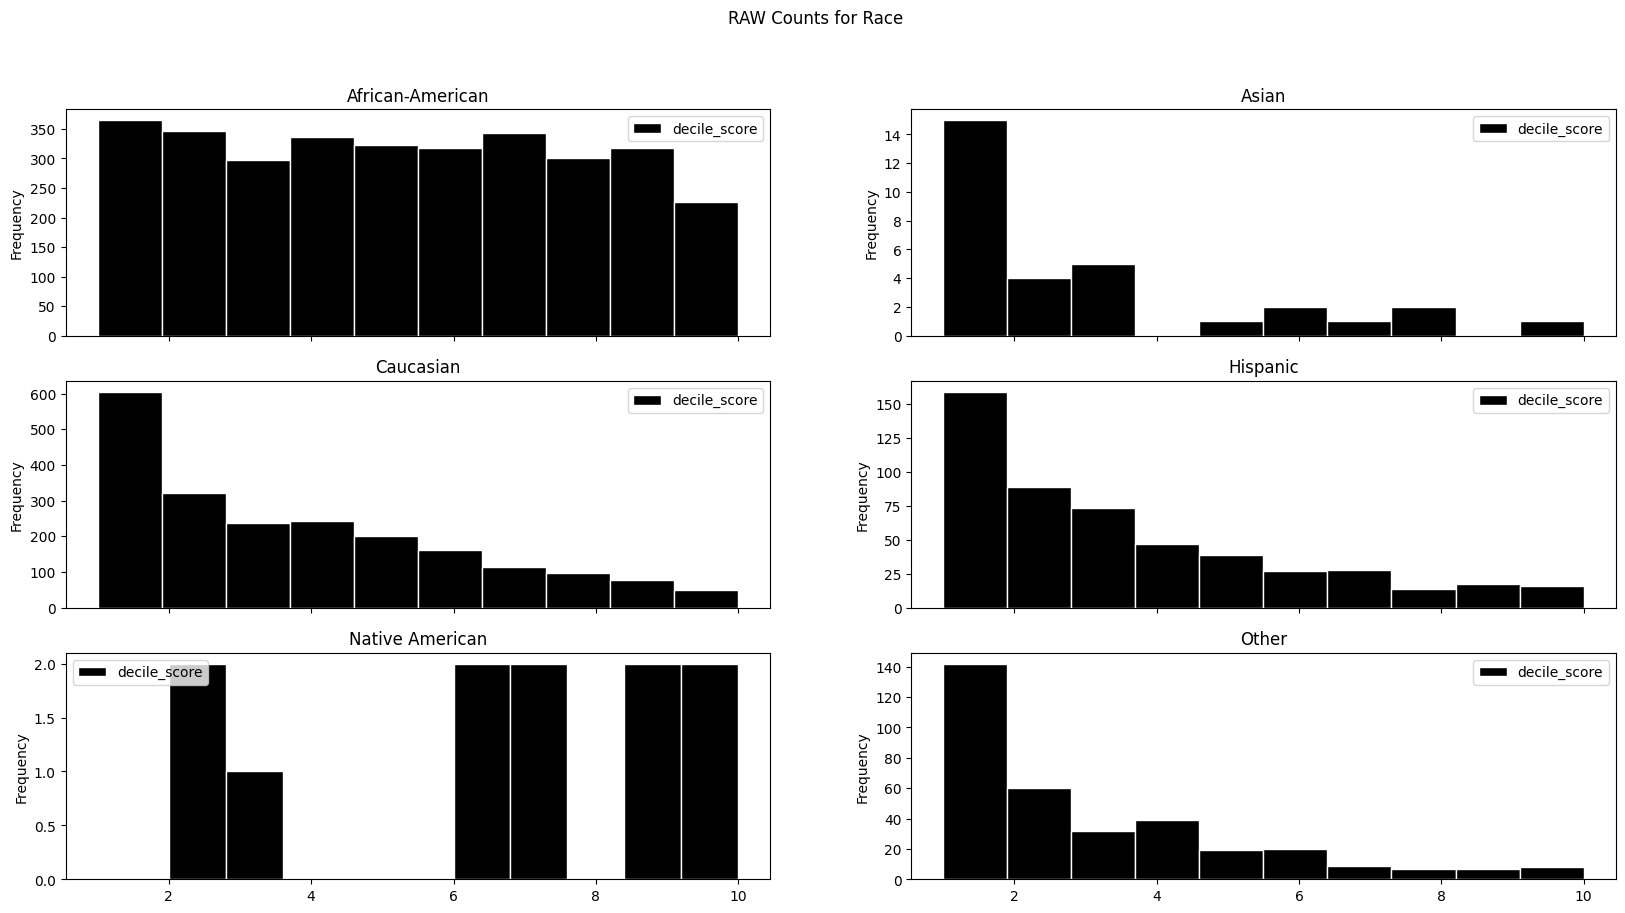

In [7]:
ax = data.plot.hist(column=["decile_score"], by="race",
                    edgecolor="w", facecolor="k", figsize=(20,10),
                    bins=10, sharex=True, layout=(3,2), title="RAW Counts for Race")

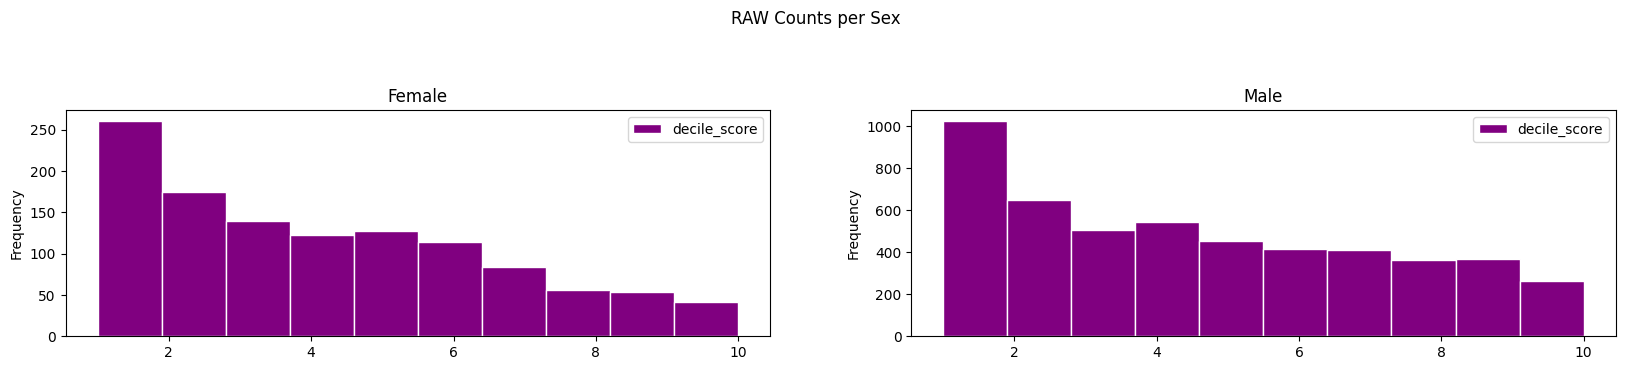

In [8]:
ax = data.plot.hist(column=["decile_score"], by="sex", edgecolor="w", facecolor= "purple", 
                    figsize=(20,10), bins=10, layout=(3,2), title="RAW Counts per Sex")

## Replicating ProPublica Analysis

Propublica used the *COMPAS scores* to predict recidivism if the score was >=5 and no recidivism if the score was < 5.

This is not a complete analysis since it solely uses the decile score and does a hard thresholding for prediction, discarding all other aspects of individuals. But let's reproduce it anyway:

>
> * Compute the thresholded version of predicted recividism call it `predicted_recid`.
> * Compute and visualize the confusion matrix for each of the races
>     * **Hint:** you can visualize a confusion matrix as a [seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
> * Compute the false positive rate and false negative rate for each of the races
> * What do you conclude?


In [9]:
data["predicted_recid"] = data.apply(lambda x: 1 if x["decile_score"] >= 5 else 0, axis = 1)

data["accuracy"] = data["predicted_recid"] == data["is_recid"]

data['tp'] = (data["predicted_recid"] == 1) & (data['is_recid'] == 1)
data['fp'] = (data["predicted_recid"] == 1) & (data['is_recid'] == 0)
data['tn'] = (data["predicted_recid"] == 0) & (data['is_recid'] == 0)
data['fn'] = (data["predicted_recid"] == 0) & (data['is_recid'] == 1)

data_grouped = data.groupby("race")[["fp", "tn", "tp", "fn","accuracy"]].sum()

#false positive rate
data_grouped["fpr"] = data_grouped.apply(lambda x: x["fp"] / (x["fp"] + x["tn"]), axis = 1)

#false negative rate
data_grouped["fnr"] = data_grouped.apply(lambda x: x["fn"] / (x["fn"] + x["tp"]), axis = 1)

data_grouped["accuracy_score"] = data_grouped.apply(lambda x: x["accuracy"] / (x["fp"] + x["tn"] + x["fn"] + x["tp"]), axis = 1)

In [10]:
data_grouped

,fp,tn,tp,fn,accuracy,fpr,fnr,accuracy_score
race,,,,,,,,
African-American,581,821,1248,525,2069,0.414408,0.296108,0.651654
Asian,1,20,6,4,26,0.047619,0.400000,0.838710
Caucasian,266,963,430,444,1393,0.216436,0.508009,0.662387
Hispanic,57,255,84,113,339,0.182692,0.573604,0.666012
Native American,2,3,6,0,9,0.400000,0.000000,0.818182
Other,27,186,43,87,229,0.126761,0.669231,0.667638


In [17]:
data_grouped[["tp", "tn", "fp", "fn"]].sum(axis=1)

race
African-American    3175
Asian                 31
Caucasian           2103
Hispanic             509
Native American       11
Other                343
dtype: int64

In [11]:
import seaborn as sns

confusion_matrix = data_grouped[["tn", "fp", "fn", "tp"]].div( data_grouped[["tp", "tn", "fp", "fn"]].sum(axis=1), axis=0 )


confusion_matrix

,tn,fp,fn,tp
race,,,,
African-American,0.258583,0.182992,0.165354,0.393071
Asian,0.645161,0.032258,0.129032,0.193548
Caucasian,0.457917,0.126486,0.211127,0.204470
Hispanic,0.500982,0.111984,0.222004,0.165029
Native American,0.272727,0.181818,0.000000,0.545455
Other,0.542274,0.078717,0.253644,0.125364


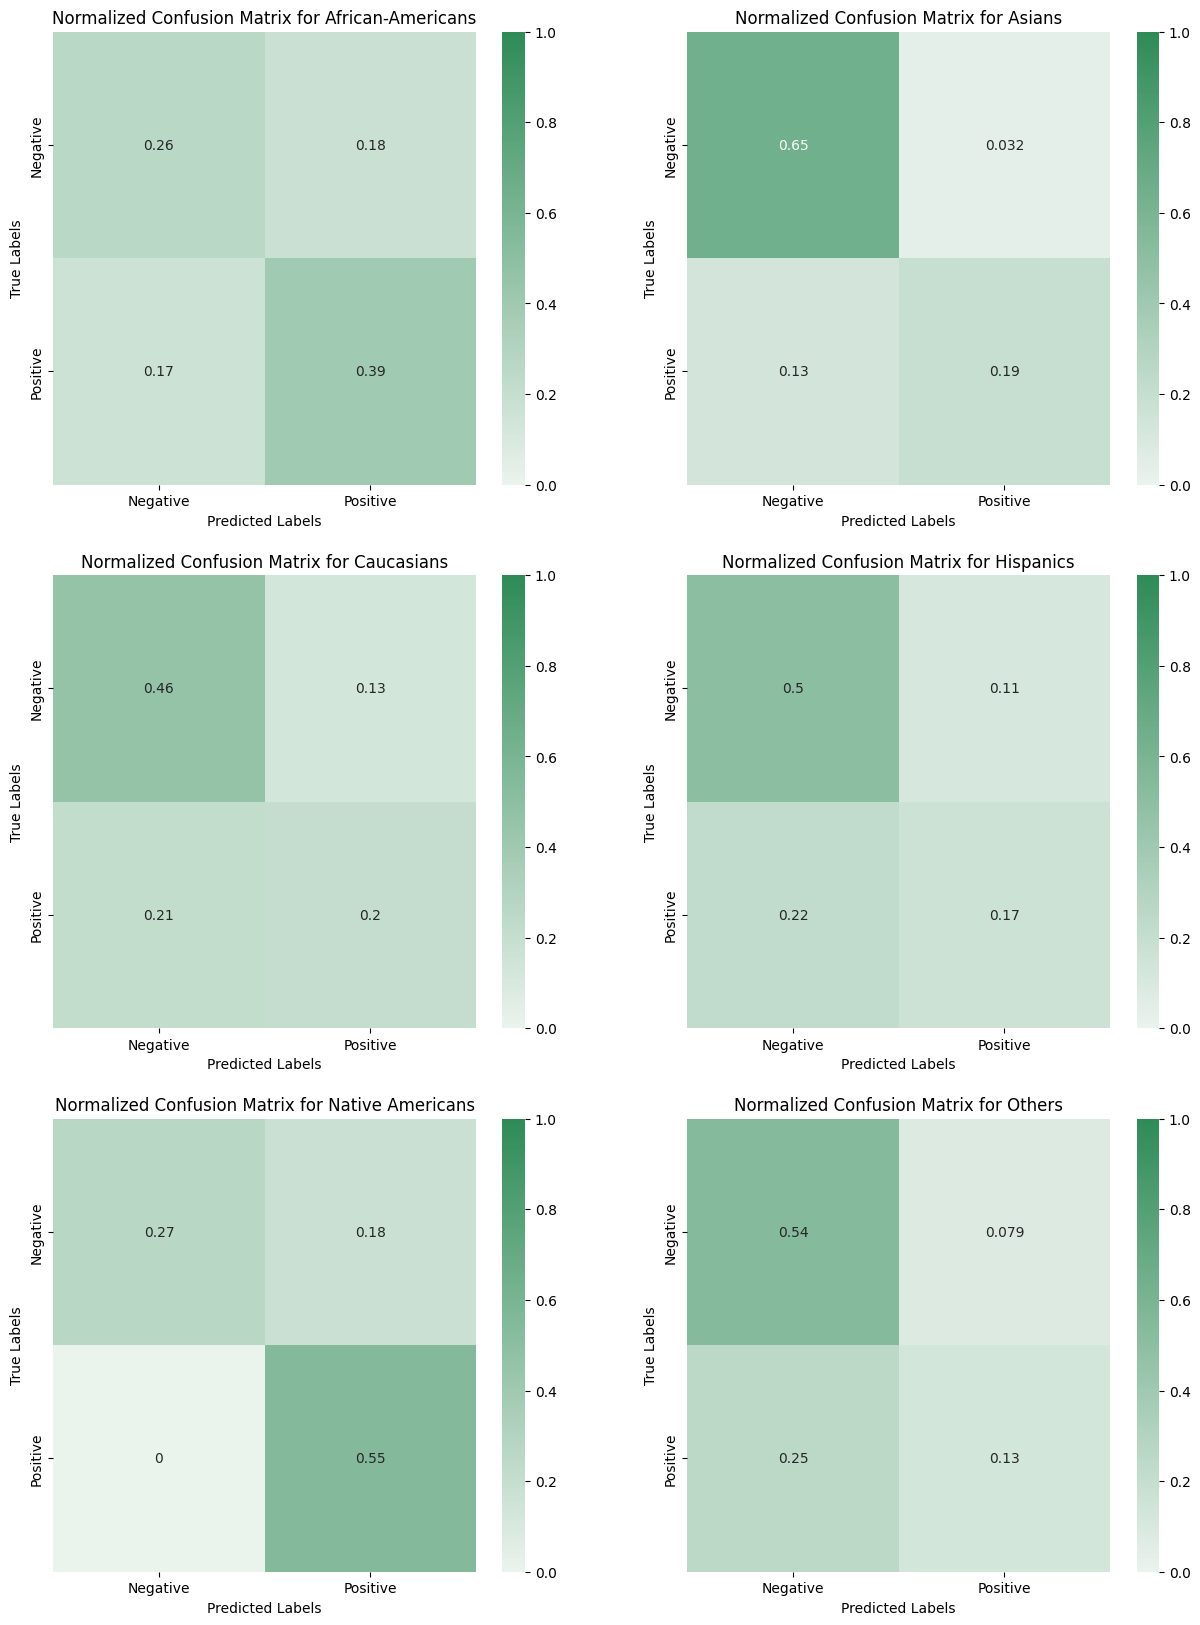

In [12]:
fig, ax = plt.subplots(3,2, figsize=(15,20))


idx = 0

attr = list(confusion_matrix.index)

for i in range(0,3):
    for j in range(0,2):
        sns.heatmap(confusion_matrix.loc[attr[idx]].values.reshape(2,2), 
                    xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"], 
                    cmap = sns.light_palette("seagreen", as_cmap=True), ax = ax[i,j], vmin = 0.0, vmax = 1.0, annot=True)
        ax[i,j].set_title("Normalized Confusion Matrix for %ss" %attr[idx])
        ax[i,j].set_xlabel("Predicted Labels")
        ax[i,j].set_ylabel("True Labels")
        idx +=1

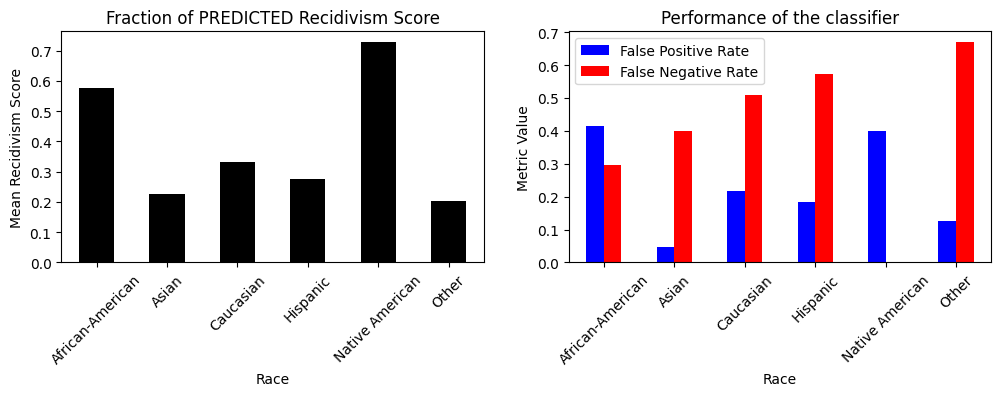

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12,3))

data.groupby("race")["predicted_recid"].mean().plot.bar(title="Fraction of PREDICTED Recidivism Score", 
                                                        xlabel = "Race", ylabel = "Mean Recidivism Score", ax=ax[0], rot=45, color="k")

data_grouped[["fpr", "fnr"]].plot.bar(title="Performance of the classifier", ylabel="Metric Value", ax=ax[1], 
                                      rot=45, xlabel = "Race", color=["b","r"])

ax[1].legend(["False Positive Rate", "False Negative Rate"], fontsize=10)

plt.show()

## Debiasing

We are now going to implement the function for **Statistical Parity** and apply it to the results of the COMPAS model (i.e. on the predicted recidivism `predicted_recid`). For this exercise, we are going to focus only on the *African-American* and *Caucasian* groups as they have more data samples in our data (however, you can repeat the steps for other demographics too!).
>
> * Select African-American and Caucasian samples from the data.
> * Compute the probability of predicting recidivism (`predicted_recid==1`) for the two populations, i.e. $P_{AA}$ for African-American and $P_{CA}$ for Caucasian. What do you observe?
> * To debias the output you need to:
>    * Compute the threshold $th = 1 - \frac{P_{CA}}{P_{AA}}$;
>    * randomly flip positive predictions to negative (1s to 0s), i.e. pick a random number $n\in\left[0,1\right)$ from a uniform distribution and flip a positive prediction if $n < th$.
> * Recompute the probabilities $P_{CA}$ and $P_{AA}$ (only now they are corrected). What do you observe?
> * Plot the confusion matrices with the corrected values. What do you observe?
> * Explain what could be the issue with this method.

In [15]:
data_sub = data[data.race.isin(["Caucasian","African-American"])].reset_index().drop("index",axis=1).copy()

In [16]:
data_sub

,sex,age,age_cat,race,decile_score,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_charge_degree,is_recid,score_text,two_year_recid,predicted_recid,accuracy,tp,fp,tn,fn
0,Male,34,25 - 45,African-American,3,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,F,1,Low,1,0,False,False,False,False,True
1,Male,24,Less than 25,African-American,4,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,F,1,Low,1,0,False,False,False,False,True
2,Male,41,25 - 45,Caucasian,6,14,-1.0,2014-02-18 05:08:24,2014-02-24 12:18:30,F,1,Medium,1,1,True,True,False,False,False
3,Female,39,25 - 45,Caucasian,1,0,-1.0,2014-03-15 05:35:34,2014-03-18 04:28:46,M,0,Low,0,0,True,False,False,True,False
4,Male,27,25 - 45,Caucasian,4,0,-1.0,2013-11-25 06:31:06,2013-11-26 08:26:57,F,0,Low,0,0,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,Male,30,25 - 45,African-American,2,0,-1.0,2014-05-09 10:01:33,2014-05-10 08:28:12,M,1,Low,1,0,False,False,False,False,True
5274,Male,20,Less than 25,African-American,9,0,-1.0,2013-10-19 11:17:15,2013-10-20 08:13:06,F,0,High,0,1,False,False,True,False,False
5275,Male,23,Less than 25,African-American,7,0,-1.0,2013-11-22 05:18:27,2013-11-24 02:59:20,F,0,Medium,0,1,False,False,True,False,False
5276,Male,23,Less than 25,African-American,3,0,-1.0,2014-01-31 07:13:54,2014-02-02 04:03:52,F,0,Low,0,0,True,False,False,True,False


In [17]:
p_aa = data_sub[(data_sub.race=='African-American') & (data_sub.predicted_recid==1)].race.count()/data_sub[data_sub.race=='African-American'].race.count()
p_ca = data_sub[(data_sub.race=='Caucasian') & (data_sub.predicted_recid==1)].race.count()/data_sub[data_sub.race=='Caucasian'].race.count()

print('Initial: G=AA (%.2f) , G=CA (%.2f)' %(p_aa, p_ca))

Initial: G=AA (0.58) , G=CA (0.33)


In [21]:
th = 1 - p_ca/p_aa

In [22]:
import numpy as np

def debiasing(val, th):
    if np.random.rand() < th:
        return 0
    else:
        return 1

In [23]:
data_sub["debiased_recid"] = data_sub.apply(lambda x: debiasing(x["predicted_recid"],th) 
                                            
                                            if (x["race"]=="African-American") and (x["predicted_recid"]==1) 
                                            else x["predicted_recid"], axis=1)

In [24]:
p_aa = data_sub[(data_sub.race=='African-American') & (data_sub.debiased_recid==1)].race.count()/data_sub[data_sub.race=='African-American'].race.count()
p_ca = data_sub[(data_sub.race=='Caucasian') & (data_sub.debiased_recid==1)].race.count()/data_sub[data_sub.race=='Caucasian'].race.count()

print('Initial: G=AA (%.2f) , G=CA (%.2f)' %(p_aa, p_ca))

Initial: G=AA (0.33) , G=CA (0.33)


In [25]:
data_sub[data_sub['race']=='African-American'][["decile_score","predicted_recid","debiased_recid"]]

,decile_score,predicted_recid,debiased_recid
0,3,0,0
1,4,0,0
5,6,1,0
7,4,0,0
9,3,0,0
...,...,...,...
5273,2,0,0
5274,9,1,1
5275,7,1,1
5276,3,0,0


In [26]:
data_sub["deb_accuracy"] = data_sub["debiased_recid"] == data_sub["is_recid"]

data_sub['tp'] = (data_sub["debiased_recid"] == 1) & (data_sub['is_recid'] == 1)
data_sub['fp'] = (data_sub["debiased_recid"] == 1) & (data_sub['is_recid'] == 0)
data_sub['tn'] = (data_sub["debiased_recid"] == 0) & (data_sub['is_recid'] == 0)
data_sub['fn'] = (data_sub["debiased_recid"] == 0) & (data_sub['is_recid'] == 1)

data_gsub = data_sub.groupby("race")[["fp", "tn", "tp", "fn","accuracy"]].sum()

#false positive rate
data_gsub["fpr"] = data_gsub.apply(lambda x: x["fp"] / (x["fp"] + x["tn"]), axis = 1)

#false negative rate
data_gsub["fnr"] = data_gsub.apply(lambda x: x["fn"] / (x["fn"] + x["tp"]), axis = 1)

data_gsub["accuracy_score"] = data_gsub.apply(lambda x: x["accuracy"] / (x["fp"] + x["tn"] + x["fn"] + x["tp"]), axis = 1)

In [27]:
data_gsub

,fp,tn,tp,fn,accuracy,fpr,fnr,accuracy_score
race,,,,,,,,
African-American,338,1064,695,1078,2069,0.241084,0.608009,0.651654
Caucasian,266,963,430,444,1393,0.216436,0.508009,0.662387


## References
- https://github.com/propublica/compas-analysis/
- https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm